In [1]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=99ac4d783325f2b57f318b938d558776aadb94aef8c3e52074c3ccf39fad2bef
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [3]:
import requests
from bs4 import BeautifulSoup
import webbrowser

def random_article(length):
  try:
    title=[]
    i=1
    while i<=length:
      a = "https://en.wikipedia.org/wiki/Special:Random"
      u = requests.get(a)
      soup = BeautifulSoup(u.content, 'html.parser')
      title.append(soup.find(class_ = "firstHeading").text)
      i=i+1
  except:
    pass   
  return title
# print(title)    

In [6]:
import wikipedia
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

In [7]:
import tensorflow_hub as hub
embed=hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
#doc_embeddings = embed(docs)

In [8]:
articles=random_article(20000)

In [9]:
wiki_lst=[]
title=[]

In [10]:
try:
  for article in articles:
    wiki_lst.append(wikipedia.page(article).content)
except:
  pass    

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


In [11]:
wiki_lst[0]

"Porsha (Bengali: পোরশা) is an Upazila of Naogaon District in the Division of Rajshahi, Bangladesh.\n\n\n== Geography ==\n\nPorsha is located at 25.0250°N 88.4833°E\ufeff / 25.0250; 88.4833. It has 18047 households, and total area 252.83 km2.Porsha Upazila is bounded by Sapahar Upazila on the north, Patnitala and Mohadevpur Upazilas on the east, Gomostapur and Niamatpur Upazilas on the south, Habibpur and Bamangola CD Blocks in Malda district, West Bengal, India, on the west.\n\n\n== Demographics ==\nAccording to 2011 Bangladesh census, Porsha had a population of 132,095. Males constituted 50.19% of the population and females 49.81%. Muslims formed 86.35% of the population, Hindus 10.38%, Christians 1.36% and others 1.90%. Porsha had a literacy rate of 42.52% for the population 7 years and above.As of the 1991 Bangladesh census, Porsha has a population of 97279. Males constitute 50.18% of the population, and females 49.82%. This Upazila's eighteen up population is 48932. Porsha has an 

In [12]:
doc_embeddings = embed(wiki_lst)

In [13]:
doc_embeddings.shape

TensorShape([5, 512])

In [14]:
doc_embeddings

<tf.Tensor: shape=(5, 512), dtype=float32, numpy=
array([[-0.04144857,  0.01884129, -0.02551987, ..., -0.05940569,
         0.00277916, -0.06544702],
       [-0.04935996,  0.0543491 ,  0.0637085 , ...,  0.0588581 ,
         0.06339952,  0.01534602],
       [-0.04675036, -0.04675053, -0.04675051, ...,  0.04663643,
        -0.04675053,  0.04657133],
       [-0.05358709,  0.04095994,  0.05399111, ...,  0.05266428,
         0.05345597, -0.05399517],
       [ 0.0151616 ,  0.03282081,  0.02501616, ...,  0.01230947,
         0.02522301, -0.00323162]], dtype=float32)>

In [16]:
query=input("Enter your search query \n>")

Enter your search query 
>May god bless you


In [17]:
type(query)

str

In [18]:
user_query=[]
user_query.append(query)

In [19]:
query_embedding=embed(user_query)

In [20]:
query_embedding

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[ 0.05307467,  0.00513646,  0.04261803, -0.07103398,  0.04327961,
         0.00198644,  0.0279901 ,  0.00588754, -0.01483849,  0.05877914,
         0.05423925,  0.0248418 , -0.01932393, -0.02390528,  0.0411259 ,
        -0.07507876, -0.02032622, -0.00384639, -0.00024757, -0.01580213,
         0.07997788,  0.03594942,  0.08359759, -0.02264386, -0.00523888,
        -0.09684805, -0.01137893, -0.04913693, -0.01087586,  0.02001721,
         0.01638985,  0.04060744, -0.02268679, -0.03292778, -0.03407335,
        -0.01772095,  0.02703672,  0.00488896, -0.00068174, -0.03200494,
        -0.0083286 , -0.05004591,  0.03936211,  0.0682622 ,  0.02487368,
        -0.03363308, -0.02093698, -0.04113913,  0.04575634,  0.01479611,
        -0.1033534 ,  0.03002192, -0.00946357,  0.00544374, -0.07496521,
         0.03550953,  0.06184912, -0.0621787 , -0.0761115 ,  0.03149251,
        -0.00723113, -0.02957178,  0.02643087,  0.01092922,  0.03086827,
 

In [21]:
sim1=cosine_similarity(doc_embeddings,query_embedding)

In [22]:
data={"Article":wiki_lst,"Similarity Score":sim1.flatten()}
df=pd.DataFrame(data)
#df.sort_values(["Similarity Score"],ascending=False, inplace=True)

In [23]:
df

,Article,Similarity Score
0,Porsha (Bengali: পোরশা) is an Upazila of Naoga...,0.100020
1,"""Pocketful of Rainbows"" is a song from the 196...",0.057115
2,The North Carolina Tar Heels Men's basketball ...,-0.008200
3,"Fatinitza was the first full-length, three-act...",-0.005613
4,Gary Fisketjon (born 1954) was an Editor and V...,-0.017395


In [24]:
# Similarity Score >mean then 1 else Similarity Score <=mean then 0
df.loc[df['Similarity Score'] <= np.mean(df["Similarity Score"]), 'Relevance'] = 0 
df.loc[df['Similarity Score'] > np.mean(df["Similarity Score"]), 'Relevance'] = 1 

In [25]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 2)
  
pca_values = pca.fit_transform(doc_embeddings)
  
explained_variance = pca.explained_variance_ratio_

In [26]:
pca_df = pd.DataFrame(pca_values)
pca_df.columns = ['x', 'y']
pca_df['Article'] = df['Article']
pca_df['Relevance'] = df['Relevance']
pca_df.to_csv('pca_df.csv', encoding='utf-8', index=False)

In [29]:
import matplotlib.pyplot as plt

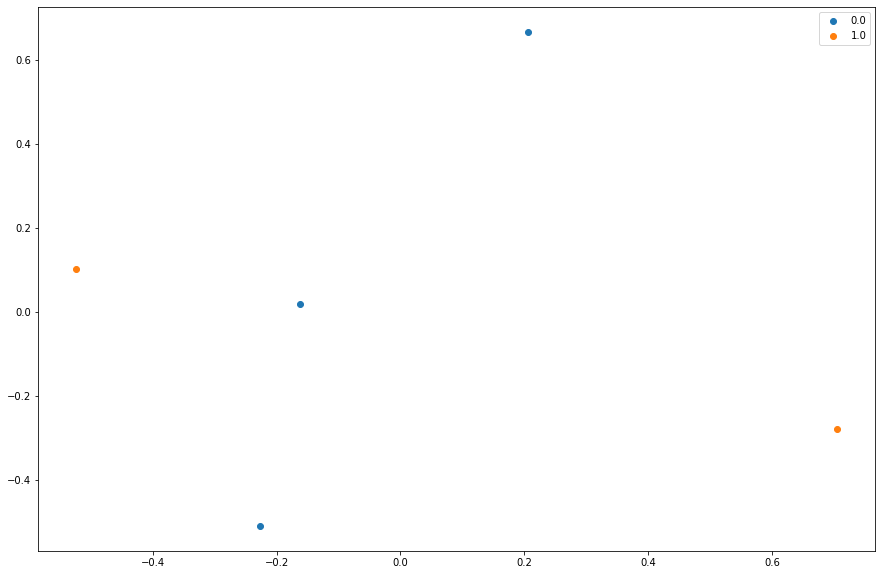

In [30]:
groups = pca_df.groupby('Relevance')
fig, ax = plt.subplots(figsize=(15, 10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', label=name)
ax.legend()
plt.show()